<a href="https://colab.research.google.com/github/AishlyManglani/Deep-Learning_-CMPE258/blob/main/neural%20networks/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#tensorflow low level
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Generate synthetic data
def generate_data(n=1000):
    x1 = np.random.uniform(-1, 1, n)
    x2 = np.random.uniform(-1, 1, n)
    x3 = np.random.uniform(-1, 1, n)
    y = np.sin(x1) + np.cos(x2) + x3**2  # Nonlinear function
    return np.vstack((x1, x2, x3)).T, y.reshape(-1, 1)

# Convert data to TensorFlow tensors
X_np, y_np = generate_data()
X = tf.convert_to_tensor(X_np, dtype=tf.float32)
y = tf.convert_to_tensor(y_np, dtype=tf.float32)

# Initialize model parameters
input_dim, hidden1, hidden2, output_dim = 3, 10, 10, 1
W1 = tf.Variable(tf.random.normal((input_dim, hidden1)))
b1 = tf.Variable(tf.zeros((hidden1,)))
W2 = tf.Variable(tf.random.normal((hidden1, hidden2)))
b2 = tf.Variable(tf.zeros((hidden2,)))
W3 = tf.Variable(tf.random.normal((hidden2, output_dim)))
b3 = tf.Variable(tf.zeros((output_dim,)))

In [3]:
# Define forward pass using TensorFlow einsum
def forward_pass(X):
    hidden1_out = tf.nn.relu(tf.einsum('ij,jk->ik', X, W1) + b1)
    hidden2_out = tf.nn.relu(tf.einsum('ij,jk->ik', hidden1_out, W2) + b2)
    output = tf.einsum('ij,jk->ik', hidden2_out, W3) + b3
    return output

# Define loss function and optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.01)
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Training loop
def train(epochs=1000):
    losses = []
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = forward_pass(X)
            loss = compute_loss(y, y_pred)
        gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
        optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))
        losses.append(loss.numpy())
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")
    return losses

Epoch 0, Loss: 3.7192
Epoch 100, Loss: 0.0224
Epoch 200, Loss: 0.0087
Epoch 300, Loss: 0.0049
Epoch 400, Loss: 0.0039
Epoch 500, Loss: 0.0034
Epoch 600, Loss: 0.0031
Epoch 700, Loss: 0.0028
Epoch 800, Loss: 0.0027
Epoch 900, Loss: 0.0025


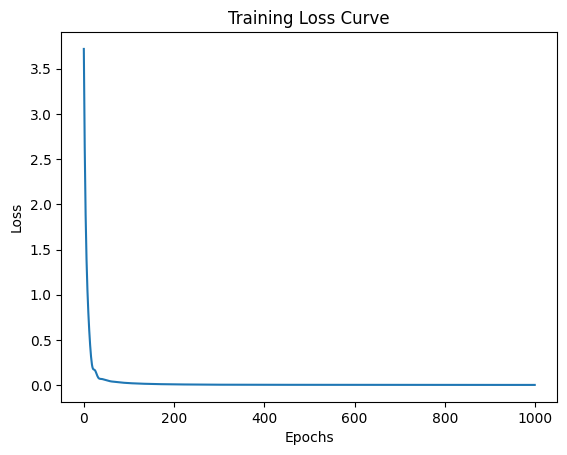

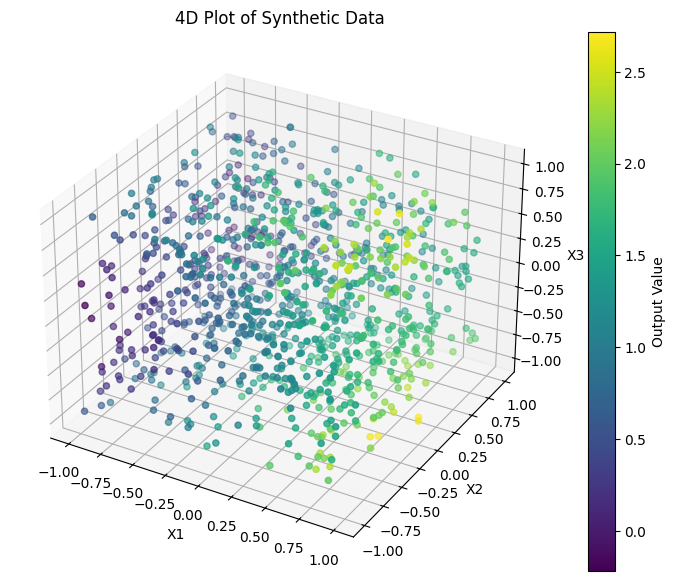

In [4]:
# Train the model
losses = train()

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

# 4D Plot
def plot_4d(X, y):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0].numpy(), X[:, 1].numpy(), X[:, 2].numpy(), c=y.numpy(), cmap='viridis')
    fig.colorbar(scatter, label='Output Value')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    plt.title("4D Plot of Synthetic Data")
    plt.show()

plot_4d(X, y)